In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('titanic_train.csv')

In [3]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


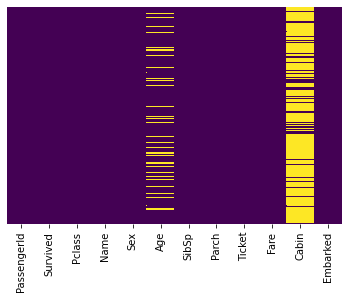

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sns.set_style('whitegrid')

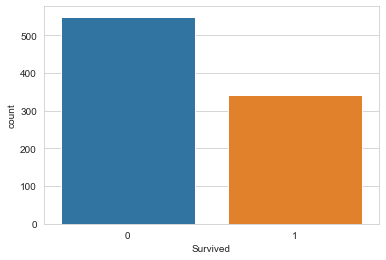

In [6]:
sns.countplot(x='Survived',data=data)

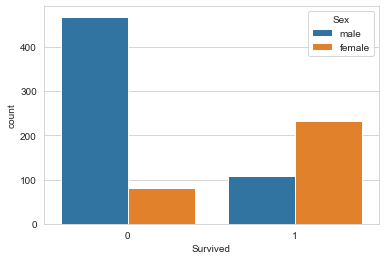

In [7]:
sns.countplot(x='Survived',data=data,hue='Sex')

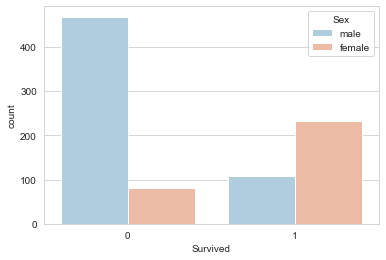

In [8]:
sns.countplot(x='Survived',data=data,hue='Sex',palette='RdBu_r')

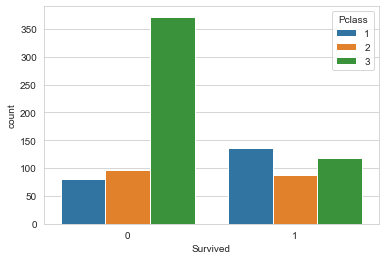

In [9]:
sns.countplot(x='Survived',data=data,hue='Pclass')

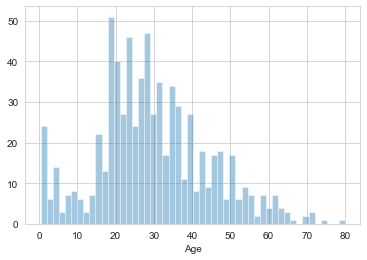

In [10]:
sns.distplot(data['Age'].dropna(),kde=False,bins=50)

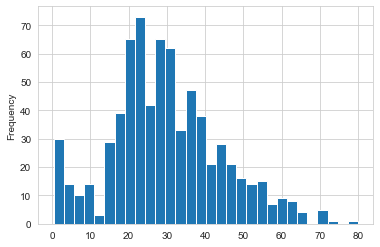

In [11]:
data['Age'].plot.hist(bins=30)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


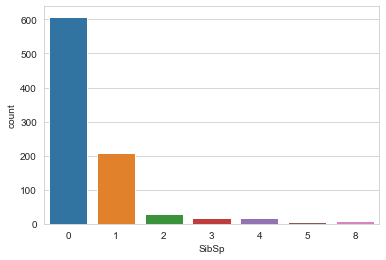

In [13]:
sns.countplot(x='SibSp',data=data)

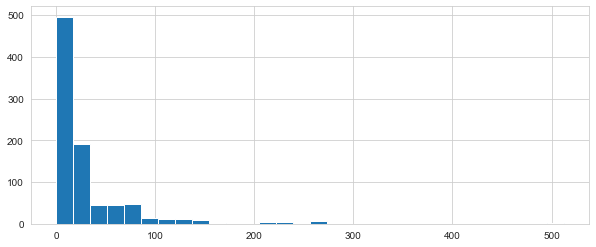

In [14]:
data['Fare'].hist(bins=30,figsize=(10,4))

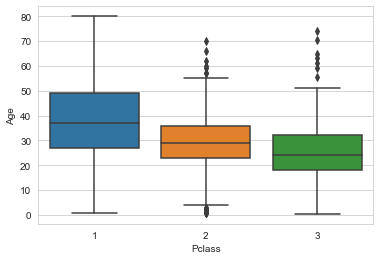

In [15]:
sns.boxplot(x='Pclass',y='Age', data=data)

In [16]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age      

In [17]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

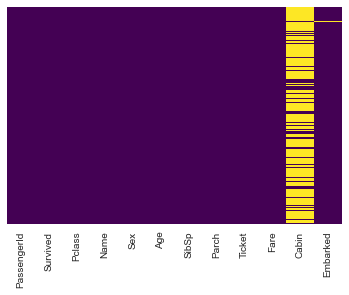

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.drop('Cabin',axis=1,inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.dropna(inplace=True)

In [22]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [23]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [24]:
data=pd.concat([data,sex,embark],axis=1)

In [25]:
data.drop(['PassengerId','Name','Sex','Ticket', 'Embarked'],axis=1,inplace=True)

In [26]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions=logmodel.predict(X_valid)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [35]:
test_data=pd.read_csv('titanic_test.csv')

In [40]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

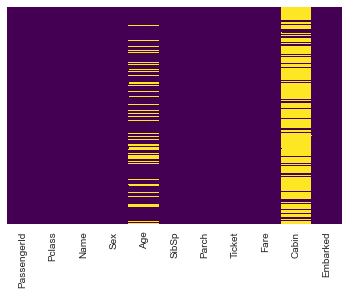

In [37]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age,axis=1)

In [44]:
test_sex=pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark=pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data=pd.concat([test_data,test_sex,test_embark],axis=1)

In [45]:
test_data.drop(['Cabin','PassengerId','Name','Sex','Ticket', 'Embarked'],axis=1,inplace=True)

In [46]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
